In [5]:
import polars as pl
import scipy.io
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np 
from typing import Literal
from transphorm.preprocessors import MatFetcher
from transphorm.framework_helpers import dataloader_to_numpy
from transphorm.model_components import AATrialDataModule
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sktime.clustering.k_means import TimeSeriesKMeans
import joblib

In [2]:
path = Path("/Users/mds8301/Library/CloudStorage/OneDrive-NorthwesternUniversity/gaby_data/over_day_5")

In [3]:

def load_data(path: Path):
    X, y = dataloader_to_numpy(path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    return X_train, X_test, y_train, y_test

In [4]:

X_train, X_test, y_train, y_test = load_data(path)

{0.0: 0.6256906077348067, 1.0: 2.489010989010989}

In [21]:
cluster = TimeSeriesKMeans(n_clusters=2)
cluster.fit(X_train)

TimeSeriesKMeans(n_clusters=2)

In [24]:

path = "/Users/mds8301/Library/CloudStorage/OneDrive-NorthwesternUniversity/gaby_data/models/ts_cluster.joblib"
joblib.dump(cluster, path)

['/Users/mds8301/Library/CloudStorage/OneDrive-NorthwesternUniversity/gaby_data/models/ts_cluster.joblib']

In [82]:
cluster = joblib.load("/Users/mds8301/Library/CloudStorage/OneDrive-NorthwesternUniversity/gaby_data/models/ts_cluster.joblib")

In [83]:
classes = cluster.predict(X_test)

In [84]:
classes

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [88]:
import matplotlib.pyplot as plt

X_test_ds = X_test.reshape(X_test.shape[0], -1)[:, ::10]
# X_test_ds.shape


(302, 611)

In [112]:
data = pl.DataFrame(X_test_ds.T)
data.shape

(611, 302)

In [113]:
data.with_columns(pl.Series('clusters', classes))
                #   pl.Series('time', np.arange(0, data.shape[1]))
# .melt(id_vars = 'clusters', variable_name='trial')


ShapeError: unable to add a column of length 302 to a DataFrame of height 611

<Axes: xlabel='pc1', ylabel='pc2'>

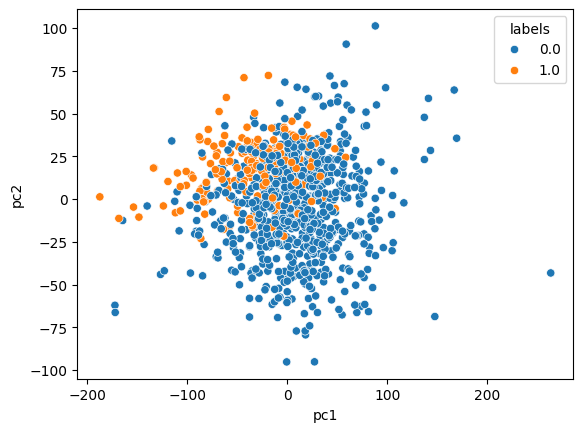

In [75]:
import seaborn as sns 
sns.scatterplot(data = data, x = 'pc1', y='pc2', hue = 'clusters')

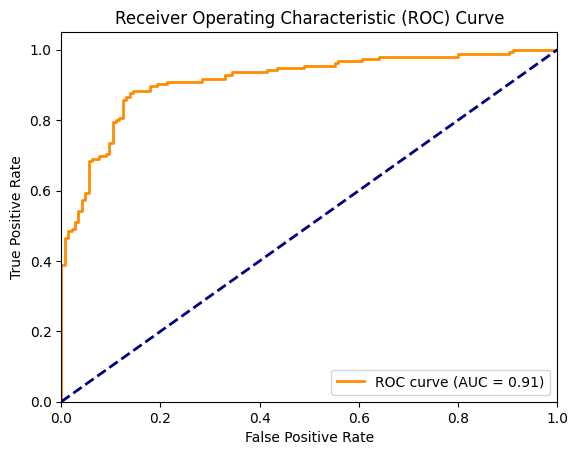

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate a toy dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

array([3.90463328e-01, 1.31070740e-01, 4.86090535e-01, 2.20910617e-01,
       4.62763436e-02, 9.47654807e-01, 7.72363239e-01, 2.10652946e-01,
       2.62962545e-01, 6.87582346e-01, 3.35752421e-02, 3.29170508e-01,
       9.95910519e-01, 5.00693064e-01, 2.80327289e-01, 8.20394408e-01,
       9.35541003e-01, 4.87080427e-02, 1.12369089e-01, 5.21312907e-01,
       5.65232790e-03, 7.44918172e-01, 9.48559833e-01, 8.97235307e-01,
       2.13075522e-02, 9.95488039e-01, 3.78296917e-04, 6.23659648e-02,
       9.88181152e-01, 3.02081520e-02, 1.31183890e-01, 1.15779051e-02,
       3.84526894e-01, 8.52139701e-01, 6.87019457e-01, 8.34889748e-01,
       9.29905434e-01, 5.95035478e-01, 9.54474344e-01, 7.23441824e-01,
       9.81377287e-01, 5.16871298e-02, 9.44227325e-01, 5.46206331e-01,
       4.98815674e-01, 9.88588874e-01, 7.67114073e-03, 9.94586937e-01,
       1.40295697e-01, 9.72180564e-03, 9.23750957e-01, 9.23492441e-01,
       9.89977759e-01, 3.43434794e-03, 3.16310404e-03, 3.29482881e-01,
      